In [1]:
import numpy as np
from scipy.spatial import distance
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

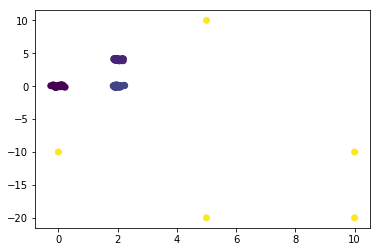

In [12]:
Data3, labels3 = make_blobs(n_samples=100, centers=[[0,0], [2, 4], [2, 0]],cluster_std=0.1, n_features=2, random_state=0)
outliers=[[5,10], [10, -10], [0, -10], [5, -20], [10,-20]]
Data_with_outliers= np.append(Data3, outliers, axis=0) 
labels_out= [10, 10, 10, 10, 10]
labels_with_outliers= np.append(labels3, labels_out, axis=0) 
#labels_with_outliers
plt.scatter(Data_with_outliers[:,0], Data_with_outliers[:,1], c=labels_with_outliers)

0
1


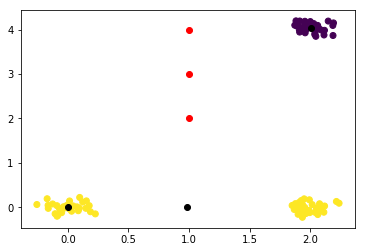

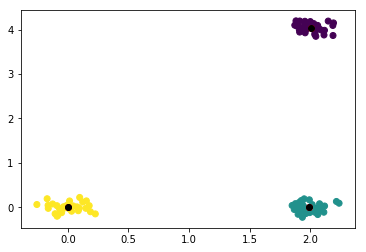

In [18]:
centers=[[1,4], [1, 2], [1, 3]]
#print(type(centers))
centers=np.array(centers)
#print(np.array(centers).shape)
dist= distance.cdist(Data3, np.array(centers))
cid = np.argmin(dist, axis=1)
#print(cid)
#print(type(cid))
num_clusters=3
new_centers=np.zeros((3,2))
for i in range(100):
    print(i)
    dist= distance.cdist(Data3, np.array(centers))
    cid = np.argmin(dist, axis=1)
    
    dist = np.amin(dist, axis = 1)
    
    
    for j in range(num_clusters):
        if len(Data3[cid==j])>0:
            new_centers[j]= np.mean(Data3[cid==j], axis=0)
        
    plt.figure()
    plt.scatter(Data3[:,0], Data3[:,1], c=cid)
    plt.scatter(centers[:,0], centers[:,1], marker='o', color= 'red')
    plt.scatter(new_centers[:,0], new_centers[:,1], marker='o', color= 'black')


    old_centers= centers
    centers=new_centers
        
    isOPTIMAL= True

    if (len(np.setdiff1d(new_centers,old_centers)))>0.1:
        isOPTIMAL= False

        
    if isOPTIMAL:
        break


0
1


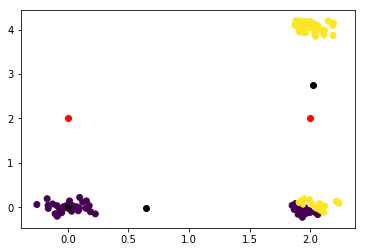

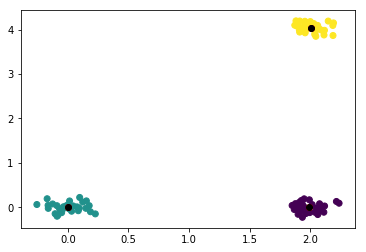

In [14]:
centers=np.array([[0,0], [0, 2], [2, 2]])
data_with_outliers=Data_with_outliers
data= Data_with_outliers
z=5
num_cluster=3
for i in range(10):
    print(i)
                    
    #centers= skin_data[np.random.choice(np.arange(len(data_with_outliers)-1), size= 10)]
    #Step 4: Compute distance between all centers and points 
    dist= distance.cdist(data_with_outliers, centers)
    dist = np.amin(dist, axis = 1)
                    
    #Step 5: Remove furthest z points
    indx_list = np.argpartition(dist, -z)[-z:]
    data_new = np.delete(data, indx_list, axis=0)
                    
    #Step 6: Compute distance with data_new and centers & save the index of min distance in cid
    dist_new = distance.cdist(data_new, centers)
    cid = np.argmin(dist_new, axis=1)
    dist_new = np.amin(dist_new, axis = 1)
                    
    #Step 7: Compute new centers as mean of data points in each clusters
    for j in range(num_cluster):
        if len(data_new[cid==j])>0:
            new_centers[j]= np.mean(data_new[cid==j], axis=0)
            #print(new_centers[j])
    #print("New centers now:{}".format(new_centers))
    #new_centers= skin_data[np.random.choice(np.arange(len(data_with_outliers)-1), size= 10)]
    plt.figure()
    plt.scatter(data_new[:,0], data_new[:,1], c=cid)
    plt.scatter(centers[:,0], centers[:,1], marker='o', color= 'red')
    plt.scatter(new_centers[:,0], new_centers[:,1], marker='o', color= 'black')               
                    
                    
    #Generate set them as new centers
    old_centers= centers
    centers= new_centers
                    
    #Step 8: Check the difference in the set of centers
    isOPTIMAL= True

    if (len(np.setdiff1d(new_centers,old_centers)))>.1:
        isOPTIMAL= False
                    
    #Step 9: Stop if value less than tolerence
    if isOPTIMAL:
        break
    